In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('kc_house_data_train.csv')

In [26]:
df.drop(columns='Unnamed: 0', inplace=True)

In [27]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,1,...,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400
17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,0,...,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013
17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,0,...,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403
17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,0,...,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028


In [28]:
df['year_sold'] = df['date'].apply(lambda x: x[0:4])

In [29]:
df.view.value_counts()

0    15571
2      775
3      410
4      270
1      264
Name: view, dtype: int64

In [31]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum()>1]

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(df[var].isnull().mean(), 3),  ' % missing values')

In [73]:
# list of numerical variables
num_vars = [var for var in df.columns if df[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
df[num_vars].head()

Number of numerical variables:  20


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [75]:
# list of variables that contain year information
year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]

year_vars

[]

In [36]:
df.yr_renovated.value_counts()

0       16564
2014       71
2007       32
2005       32
2000       31
        ...  
1934        1
1959        1
1944        1
1951        1
1948        1
Name: yr_renovated, Length: 69, dtype: int64

In [39]:
df.view.value_counts()

0    15571
2      775
3      410
4      270
1      264
Name: view, dtype: int64

In [40]:
df.condition.value_counts()

3    11244
4     4516
5     1367
2      139
1       24
Name: condition, dtype: int64

In [48]:
year_ren_dict = {'N/A':0}

df.yr_renovated = df.yr_renovated.replace(year_ren_dict)


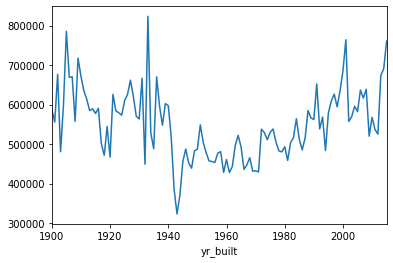

In [55]:
df.groupby('yr_built')['price'].mean().plot()

In [62]:
max_price = df.price.max()
min_price = df.price.min()

In [85]:
#  list of discrete variables
discrete_vars = [var for var in num_vars if len(df[var].unique())<20 and var not in year_vars+['Id']]

print('Number of discrete variables: ', len(discrete_vars))
discrete_vars

Number of discrete variables:  6


['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

In [86]:
# list of continuous variables
cont_vars = [var for var in num_vars if var not in discrete_vars+year_vars+['Id']]

print('Number of continuous variables: ', len(cont_vars))
cont_vars

Number of continuous variables:  14


['id',
 'price',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

    Outliers

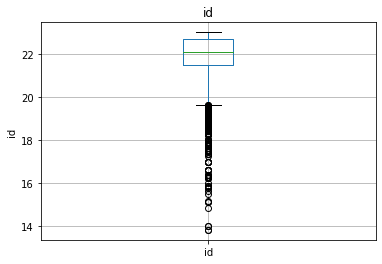

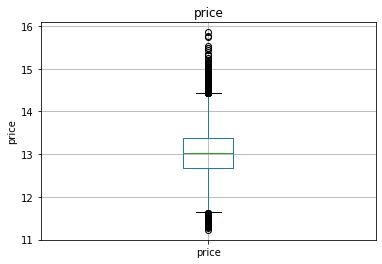

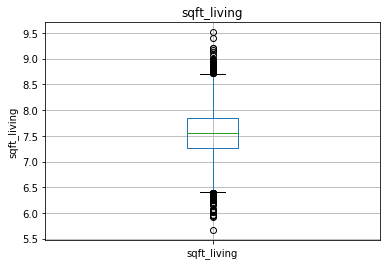

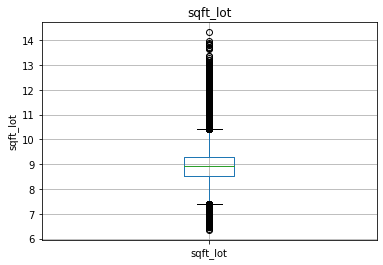

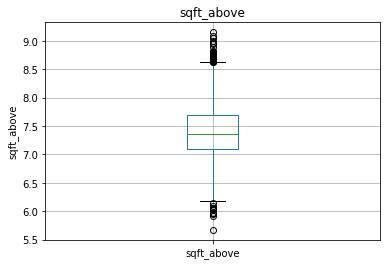

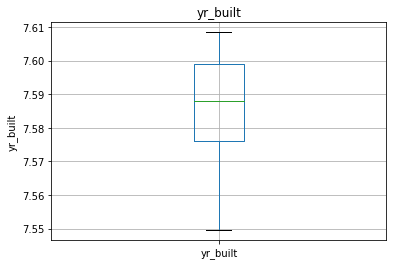

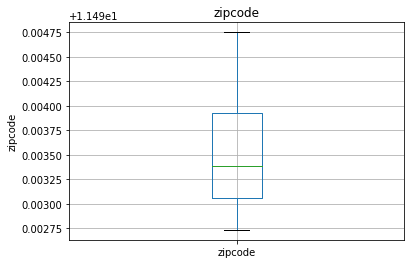

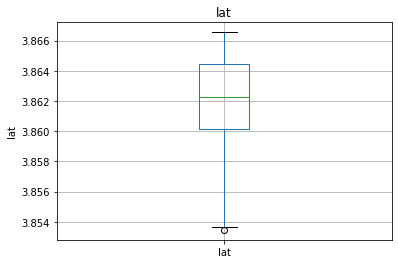

/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


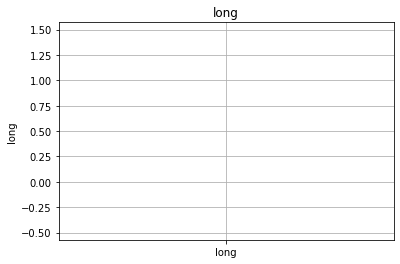

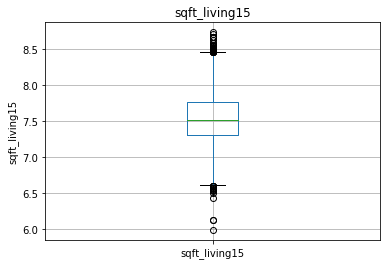

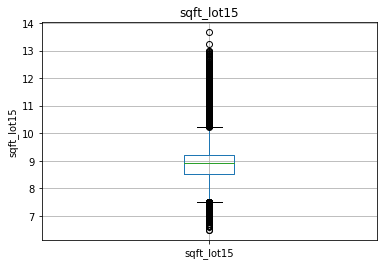

In [80]:
# let's make boxplots to visualise outliers in the continuous variables 

def find_outliers(df, var):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in df[var].unique():
        pass
    else:
        df[var] = np.log(df[var])
        df.boxplot(column=var)
        plt.title(var)
        plt.ylabel(var)
        plt.show()
    
for var in cont_vars:
    find_outliers(df, var)

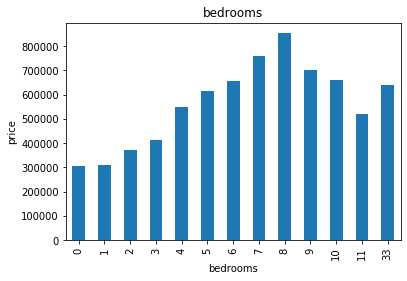

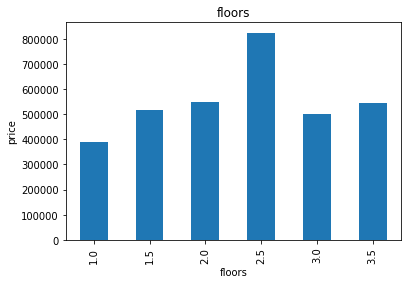

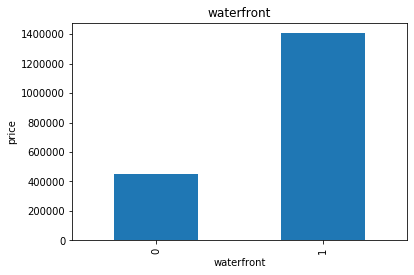

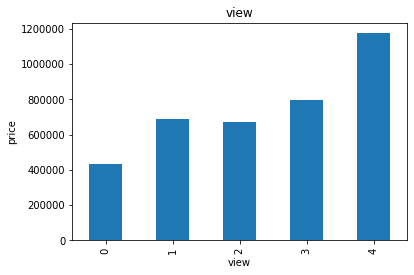

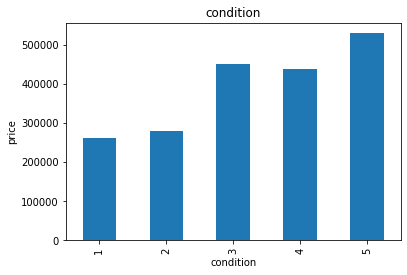

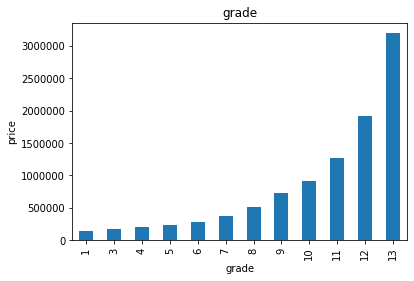

In [89]:
def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)['price'].median().plot.bar()
    plt.title(var)
    plt.ylabel('price')
    plt.show()
    
for var in discrete_vars:
    analyse_discrete(df, var)

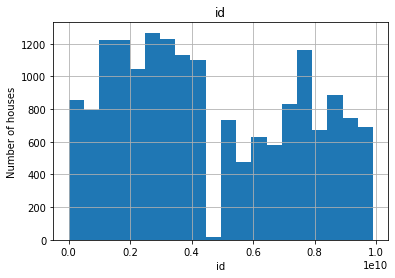

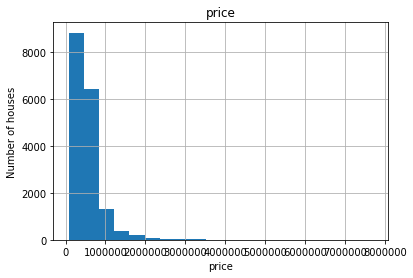

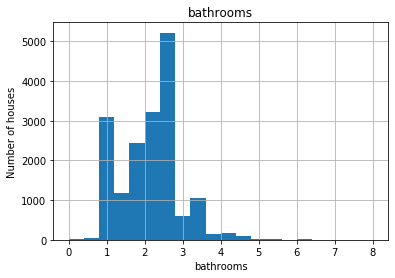

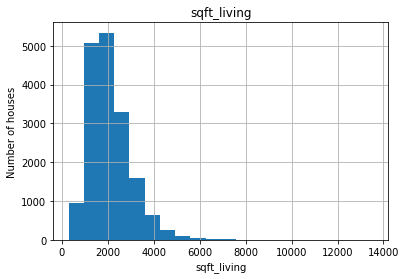

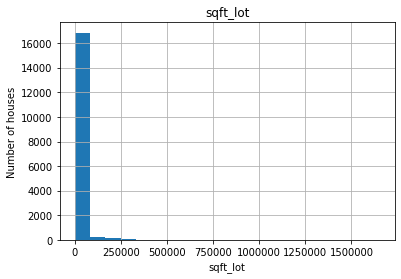

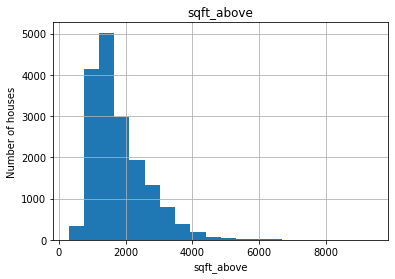

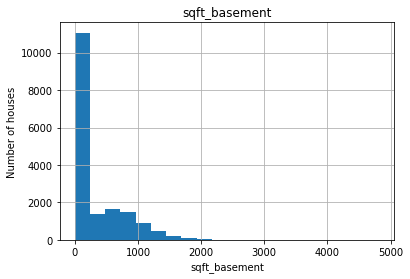

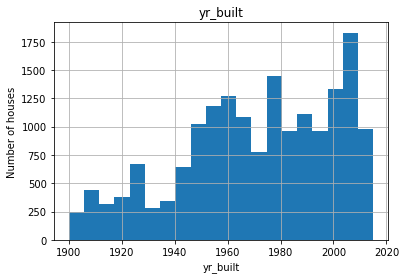

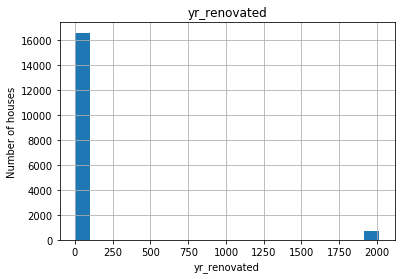

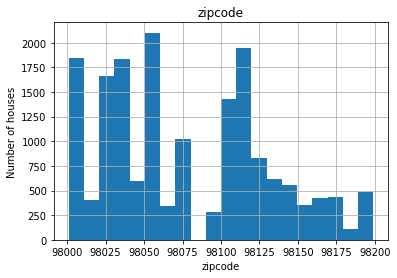

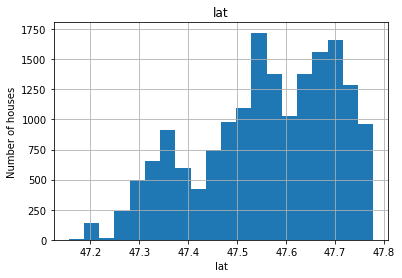

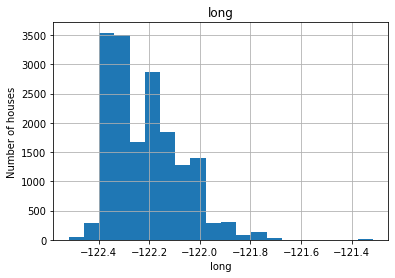

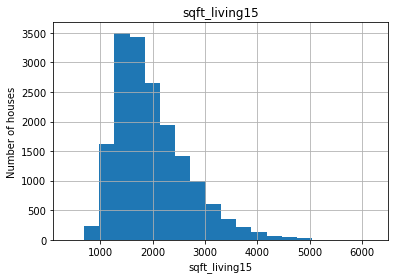

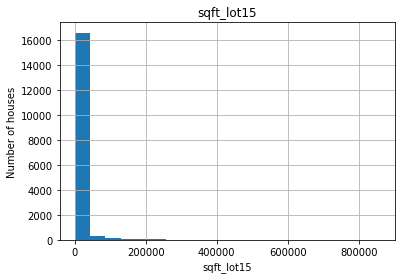

In [91]:
# Let's go ahead and analyse the distributions of these variables
def analyse_continous(df, var):
    df = df.copy()
    df[var].hist(bins=20)
    plt.ylabel('Number of houses')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in cont_vars:
    analyse_continous(df, var)

In [94]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year_sold'],
      dtype='object')

In [100]:
target = df.price
features = df[['bedrooms', 'bathrooms', 'bathrooms', 'sqft_living', 'sqft_lot15', 'yr_built', 'lat', 'long']]

In [102]:
def analyse_transformed_continous(features, var):
    features = features.copy()

    if 0 in features[var].unique():
            pass
    else:
        # log transform the variable
        features[var] = np.log(features[var])
        features[var].hist(bins=20)
        plt.ylabel('Number of houses')
        plt.xlabel(var)
        plt.title(var)
        plt.show()
    
for var in cont_vars:
    analyse_transformed_continous(features, var)

KeyError: 'id'